In [60]:
import os
import pandas as pd 

In [61]:
data_path = os.path.join('data','zippedData')
data_files = os.listdir(data_path)
data_files.pop(data_files.index('.ipynb_checkpoints'))
data_files.pop(data_files.index('Untitled.ipynb'))
data_files = [os.path.join(data_path,file) for file in data_files]
data_files

['data/zippedData/imdb.title.crew.csv.gz',
 'data/zippedData/tmdb.movies.csv.gz',
 'data/zippedData/imdb.title.akas.csv.gz',
 'data/zippedData/imdb.title.ratings.csv.gz',
 'data/zippedData/imdb.name.basics.csv.gz',
 'data/zippedData/rt.reviews.tsv.gz',
 'data/zippedData/imdb.title.basics.csv.gz',
 'data/zippedData/rt.movie_info.tsv.gz',
 'data/zippedData/tn.movie_budgets.csv.gz',
 'data/zippedData/bom.movie_gross.csv.gz',
 'data/zippedData/imdb.title.principals.csv.gz']

In [62]:
data = {}
name_dict={'imdb.title.crew.csv.gz':"crew",
           'tmdb.movies.csv.gz':"movies",
           'imdb.title.akas.csv.gz':"akas",
           'imdb.title.ratings.csv.gz':"ratings",
           'imdb.name.basics.csv.gz':"name_basics",
           'rt.reviews.tsv.gz':"reviews",
           'imdb.title.basics.csv.gz':"title_basics",
           'rt.movie_info.tsv.gz':"movie_info",
           'tn.movie_budgets.csv.gz':"movie_budgets",
           'bom.movie_gross.csv.gz':"movie_gross",
           'imdb.title.principals.csv.gz':"principals"
          }
for file in data_files:
    try:
        df = pd.read_csv(file)
    except:
        print(file)
        continue
    file_name = file.split('/')[-1]
    data[name_dict[file_name]] = df
    
data["movie_info"]=pd.read_csv('data/zippedData/rt.movie_info.tsv.gz', sep="\t")
data["reviews"]=pd.read_csv('data/zippedData/rt.reviews.tsv.gz', sep="\t", encoding="latin1")

data/zippedData/rt.reviews.tsv.gz
data/zippedData/rt.movie_info.tsv.gz


In [63]:
data.keys()

dict_keys(['crew', 'movies', 'akas', 'ratings', 'name_basics', 'title_basics', 'movie_budgets', 'movie_gross', 'principals', 'movie_info', 'reviews'])

<h1>Renaming Columns to Match 'title' Column</h1>

In [64]:
data['title_basics'] = data['title_basics'].rename(columns={'primary_title':'title'})
data['movie_budgets'] = data['movie_budgets'].rename(columns={'movie':'title'})

<h1>Getting Rid of Dollar Signs and Commas Movie_Budgets</h1>

In [65]:
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace(',', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].str.replace('$', '')
data['movie_budgets']['worldwide_gross'] = data['movie_budgets']['worldwide_gross'].astype(int)

data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace(',', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].str.replace('$', '')
data['movie_budgets']['production_budget'] = data['movie_budgets']['production_budget'].astype(int)

data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].str.replace(',', '')
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].str.replace('$', '')
data['movie_budgets']['domestic_gross'] = data['movie_budgets']['domestic_gross'].astype(int)

In [66]:
data['movie_budgets'].head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [67]:
data['movie_budgets'] = data['movie_budgets'].drop(columns=['release_date','domestic_gross'])

In [68]:
data['movie_budgets'].head()

,id,title,production_budget,worldwide_gross
0,1,Avatar,425000000,2776345279
1,2,Pirates of the Caribbean: On Stranger Tides,410600000,1045663875
2,3,Dark Phoenix,350000000,149762350
3,4,Avengers: Age of Ultron,330600000,1403013963
4,5,Star Wars Ep. VIII: The Last Jedi,317000000,1316721747


In [69]:
data['ratings'] = data['ratings'][data['ratings'].numvotes >= 100]

In [70]:
data['ratings'].shape

(28753, 3)

In [71]:
data['ratings']['mean_diff'] = data['ratings'].averagerating - data['ratings'].averagerating.mean()

In [72]:
data['ratings'].head()

,tconst,averagerating,numvotes,mean_diff
1,tt10384606,8.9,559,2.992985
3,tt1043726,4.2,50352,-1.707015
5,tt1069246,6.2,326,0.292985
6,tt1094666,7.0,1613,1.092985
7,tt1130982,6.4,571,0.492985


In [73]:
data['akas'].rename(columns={'title_id': 'tconst'}, inplace = True)

In [74]:
tconst_to_title = pd.merge(data['akas'],data['ratings'],on='tconst')

In [75]:
tconst_to_title = tconst_to_title.drop(columns=['ordering','region','language','types','attributes','is_original_title'])

In [76]:
tconst_to_title.head()

,tconst,title,averagerating,numvotes,mean_diff
0,tt0369610,Джурасик свят,7.0,539338,1.092985
1,tt0369610,Jurashikku warudo,7.0,539338,1.092985
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,7.0,539338,1.092985
3,tt0369610,O Mundo dos Dinossauros,7.0,539338,1.092985
4,tt0369610,Jurassic World,7.0,539338,1.092985


In [77]:
master_table = pd.merge(tconst_to_title,data['movie_budgets'],on='title')

In [78]:
master_table.head()

,tconst,title,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross
0,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864
1,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864
2,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864
3,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864
4,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864


In [79]:
master_table['success_score'] = master_table.averagerating * (master_table.worldwide_gross / master_table.production_budget)

In [80]:
master_table

,tconst,title,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
0,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
1,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
2,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
3,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
4,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
...,...,...,...,...,...,...,...,...,...
8904,tt5462602,The Big Sick,7.6,104008,1.692985,64,5000000,53972860,82.038747
8905,tt5649108,Thoroughbreds,6.7,25098,0.792985,47,5000000,3187302,4.270985
8906,tt5649108,Thoroughbreds,6.7,25098,0.792985,47,5000000,3187302,4.270985
8907,tt6164502,November,7.2,2455,1.292985,81,250000,191862,5.525626


In [81]:
master_table[master_table.tconst == 'tt0369610']

,tconst,title,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
0,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
1,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
2,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
3,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
4,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
5,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
6,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
7,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
8,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647
9,tt0369610,Jurassic World,7.0,539338,1.092985,34,215000000,1648854864,53.683647


In [82]:
master_table.drop_duplicates(subset = ['tconst'],inplace=True)

In [83]:
master_table.shape

(2521, 9)

In [84]:
master_table = pd.merge(data['title_basics'],master_table,on='tconst')

In [85]:
master_table.shape

(2521, 14)

In [86]:
list(master_table['genres'])

['Adventure,Animation,Comedy',
 'Action,Animation,Comedy',
 'Adventure,Drama,Romance',
 'Horror',
 'Adventure,Comedy,Drama',
 'Action,Crime,Drama',
 'Action,Adventure,Sci-Fi',
 'Comedy,Drama',
 'Comedy,Family',
 'Comedy,Drama,Romance',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'Drama,History,War',
 'Action,Thriller',
 'Comedy',
 'Action,Adventure,Thriller',
 'Horror,Mystery,Thriller',
 'Action,Drama,Family',
 'Drama,Romance,Sci-Fi',
 'Adventure,Animation,Comedy',
 'Action,Adventure,Sci-Fi',
 'Biography,Drama,History',
 'Comedy,Drama,Romance',
 'Drama,Romance,War',
 'Action,Adventure,Comedy',
 'Action,Adventure,Animation',
 'Action,Adventure,Fantasy',
 'Biography,Drama,Sport',
 'Adventure,Drama,Fantasy',
 'Horror,Thriller',
 'Action,Crime,Thriller',
 'Action,Adventure,Sci-Fi',
 'Crime,Thriller',
 'Horror,Thriller',
 'Comedy,Horror',
 'Drama',
 'Drama,Mystery,Sci-Fi',
 'Action,Comedy,Crime',
 'Adventure,Animation,Comedy',
 'Action,Crime,Thriller',
 'Comedy,Drama,Music',

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline

master_table.success_score.describe()

count    2521.000000
mean       22.242049
std        67.912205
min         0.000000
25%         2.347150
50%        10.227287
75%        22.760200
max      2186.480186
Name: success_score, dtype: float64

In [88]:
gml=list(master_table["genres"].unique())
genre_list=[]
for genres in gml:
    genre_list.append(genres.split(","))
genre_list
genre_master=[]
for genre in genre_list:
    for subgenre in genre:
        genre_master.append(subgenre)
unique_genre_master=set(genre_master)
vector=list(range(0,2521))
df_genres=[]
df_consts=[]
for genre in unique_genre_master:
    for number in vector:
        if genre in master_table.iloc[number, 5]:
            df_genres.append(genre)
            df_consts.append(master_table.iloc[number, 0])
genre_table=pd.DataFrame({'tconst':df_consts, 'genre':df_genres})
complete_genre_table=pd.merge(genre_table, master_table, how="left", on="tconst")
complete_genre_table

,tconst,genre,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,id,production_budget,worldwide_gross,success_score
0,tt0337692,Drama,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",On the Road,6.1,37886,0.192985,17,25000000,9313302,2.272446
1,tt0359950,Drama,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",The Secret Life of Walter Mitty,7.3,275300,1.392985,37,91000000,187861183,15.070183
2,tt0365907,Drama,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",A Walk Among the Tombstones,6.5,105116,0.592985,67,28000000,62108587,14.418065
3,tt0376136,Drama,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",The Rum Diary,6.2,94787,0.292985,16,45000000,21544732,2.968385
4,tt0393049,Drama,Anderson's Cross,Anderson's Cross,2010,98.0,"Comedy,Drama,Romance",Anderson's Cross,5.5,106,-0.407015,65,300000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6089,tt7146054,Fantasy,The Guardian,Da Hu Fa,2017,93.0,"Action,Animation,Fantasy",The Guardian,7.1,581,1.192985,22,70000000,94973540,9.633030
6090,tt7634968,Fantasy,What Men Want,What Men Want,2019,117.0,"Comedy,Fantasy,Romance",What Men Want,4.9,10141,-1.007015,21,20000000,69911903,17.128416
6091,tt8079248,Fantasy,Yesterday,Yesterday,2019,116.0,"Comedy,Fantasy,Music",All You Need Is Love,6.3,256,0.392985,59,300000,3565259,74.870439
6092,tt8180482,Fantasy,9: Nine,9: Nine,2019,149.0,"Fantasy,Horror,Sci-Fi",Nine,7.3,1104,1.392985,100,80000000,53508858,4.882683


<BarContainer object of 22 artists>

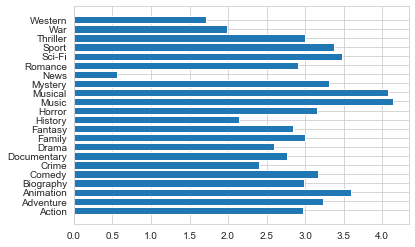

In [89]:
complete_genre_table.groupby("genre").mean().sort_values("success_score", ascending=False)
plt.barh(complete_genre_table.groupby("genre").mean().index, complete_genre_table.groupby("genre").mean().worldwide_gross/complete_genre_table.groupby("genre").mean().production_budget)

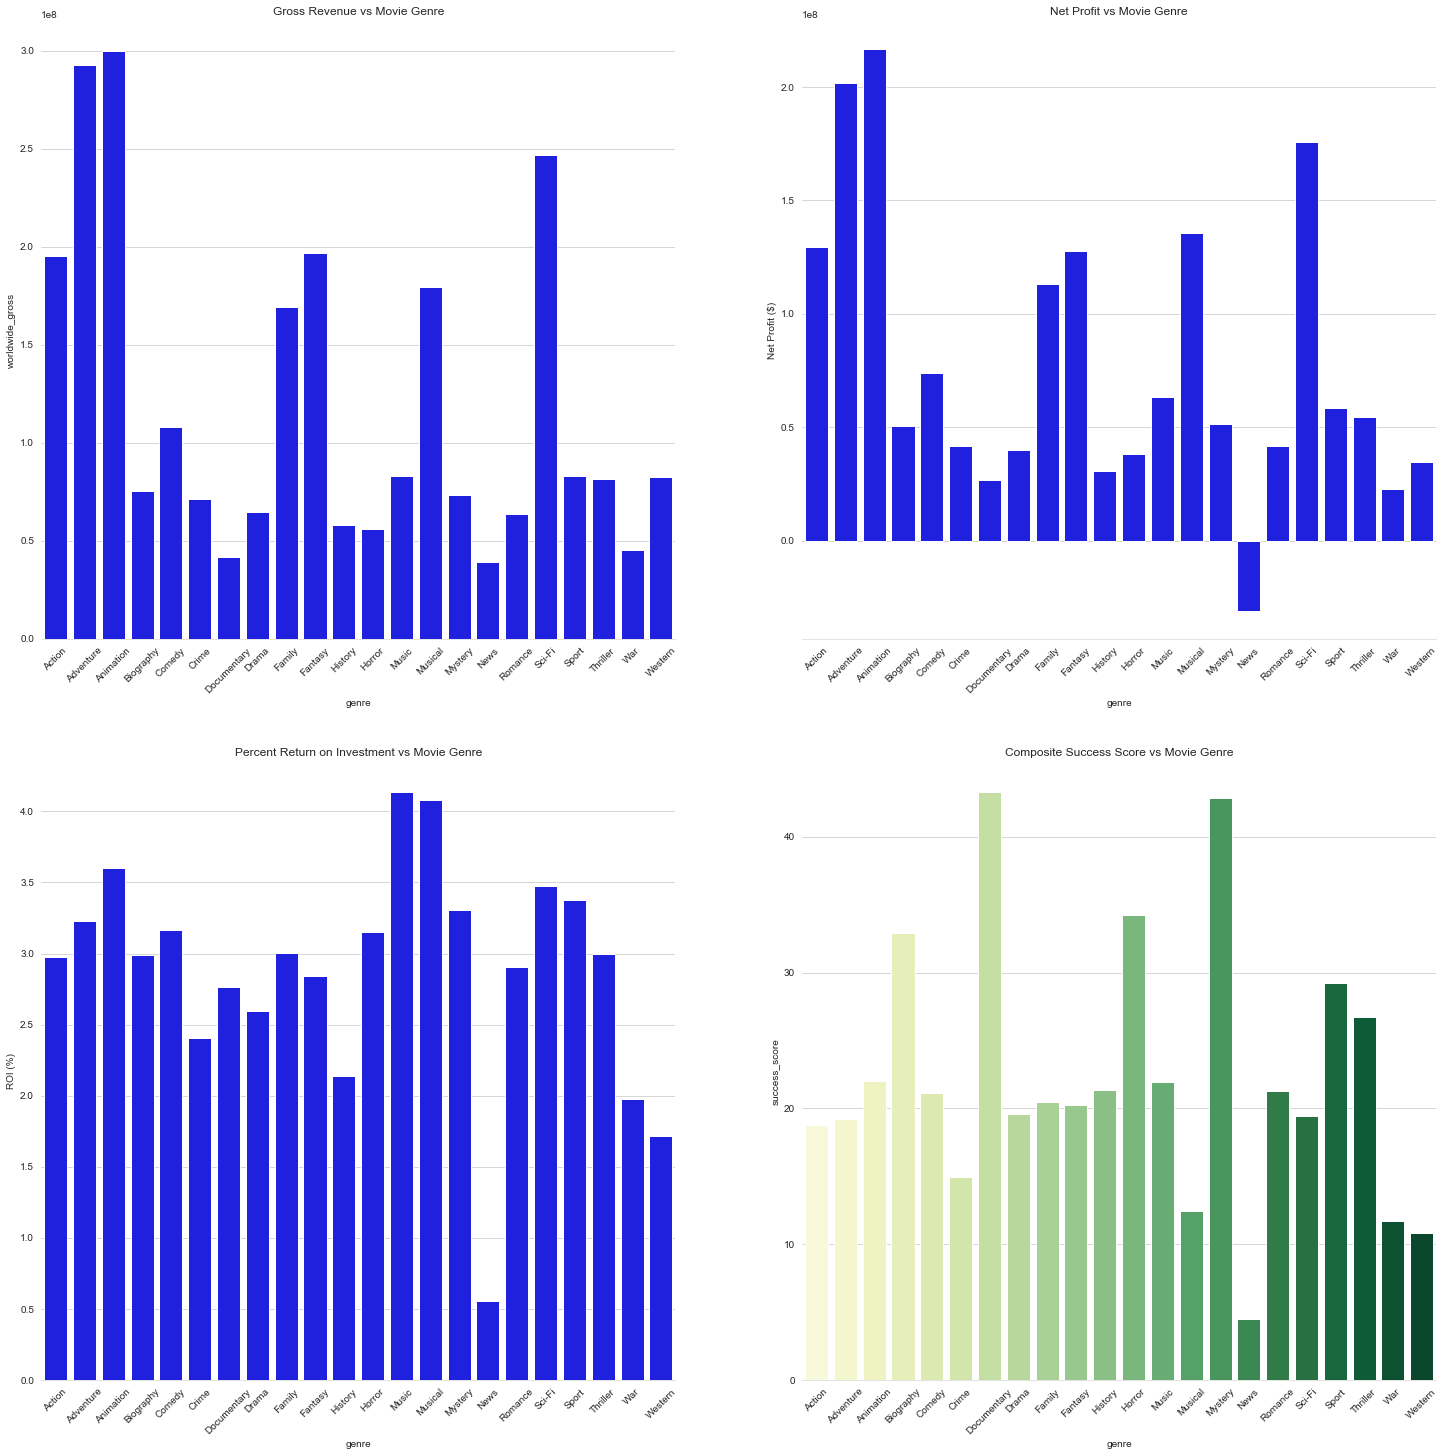

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# sns.set()

figure, ax = plt.subplots(2, 2, figsize=(25, 25))
x=complete_genre_table.groupby("genre").mean().index
y0_gross_rev= complete_genre_table.groupby("genre").mean().worldwide_gross
y1_net_prof= complete_genre_table.groupby("genre").mean().worldwide_gross-complete_genre_table.groupby("genre").mean().production_budget
y2_roi_percent= complete_genre_table.groupby("genre").mean().worldwide_gross/complete_genre_table.groupby("genre").mean().production_budget
y3_comp= complete_genre_table.groupby("genre").mean().success_score

ax[0][0].set_title('Gross Revenue vs Movie Genre')
ax[0][0].set_xlabel('Movie Genre')
ax[0][0].set_ylabel('Gross Revenue ($)')
ax[0][1].set_title('Net Profit vs Movie Genre')
ax[0][1].set_xlabel('Movie Genre')
ax[0][1].set_ylabel('Net Profit ($)')
ax[1][0].set_title('Percent Return on Investment vs Movie Genre')
ax[1][0].set_xlabel('Movie Genre')
ax[1][0].set_ylabel('ROI (%)')
ax[1][1].set_title('Composite Success Score vs Movie Genre')
ax[1][1].set_xlabel('Movie Genre')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=45)
ax[0][1].set_xticklabels(x,rotation=45)
ax[1][0].set_xticklabels(x,rotation=45)
ax[1][1].set_xticklabels(x,rotation=45)

ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_color('#DDDDDD')

ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_color('#DDDDDD')

ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_color('#DDDDDD')

ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_color('#DDDDDD')

# norm = plt.Normalize(y0_gross_rev.values.min(), y0_gross_rev.values.max())
# colors = plt.cm.copper_r(norm(y0_gross_rev))

sns.set_style("whitegrid")
sns.barplot(x, y0_gross_rev, ax=ax[0][0], color='blue')
sns.barplot(x, y1_net_prof, ax=ax[0][1], color='blue')
sns.barplot(x, y2_roi_percent, ax=ax[1][0], color='blue')
sns.barplot(x, y3_comp, ax=ax[1][1], palette='YlGn')

# ax[0][0].bar(x, y0_gross_rev)
# ax[0][1].bar(x, y1_net_prof)
# ax[1][0].bar(x, y2_roi_percent)
# ax[1][1].bar(x, y3_comp)


In [91]:
data['movie_info'].head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [92]:
master_table = pd.merge(master_table, data['movie_info'],on='id')

In [93]:
master_table.head()

,tconst,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",Saving Grace,8.1,263,2.192985,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
1,tt1072748,Winchester,Winchester,2018,99.0,"Biography,Drama,Fantasy",Winchester,5.4,24351,-0.507015,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
2,tt1135084,Takers,Takers,2010,107.0,"Action,Crime,Thriller",Takers,6.2,53377,0.292985,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
3,tt1226837,Beautiful Boy,Beautiful Boy,2018,120.0,"Biography,Drama",Beautiful Boy,7.3,30368,1.392985,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
4,tt1230168,Same Kind of Different as Me,Same Kind of Different as Me,2017,119.0,"Biography,Drama",Same Kind of Different as Me,6.5,4319,0.592985,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films


<BarContainer object of 66 artists>

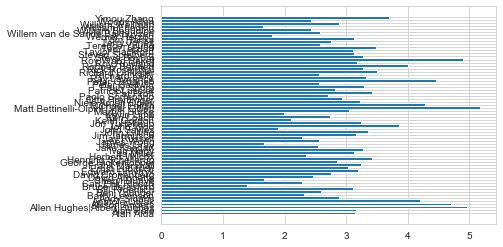

In [94]:
master_table.groupby("director").mean().sort_values("success_score", ascending=False)
plt.barh(master_table.groupby("director").mean().index, master_table.groupby("director").mean().worldwide_gross/master_table.groupby("director").mean().production_budget)

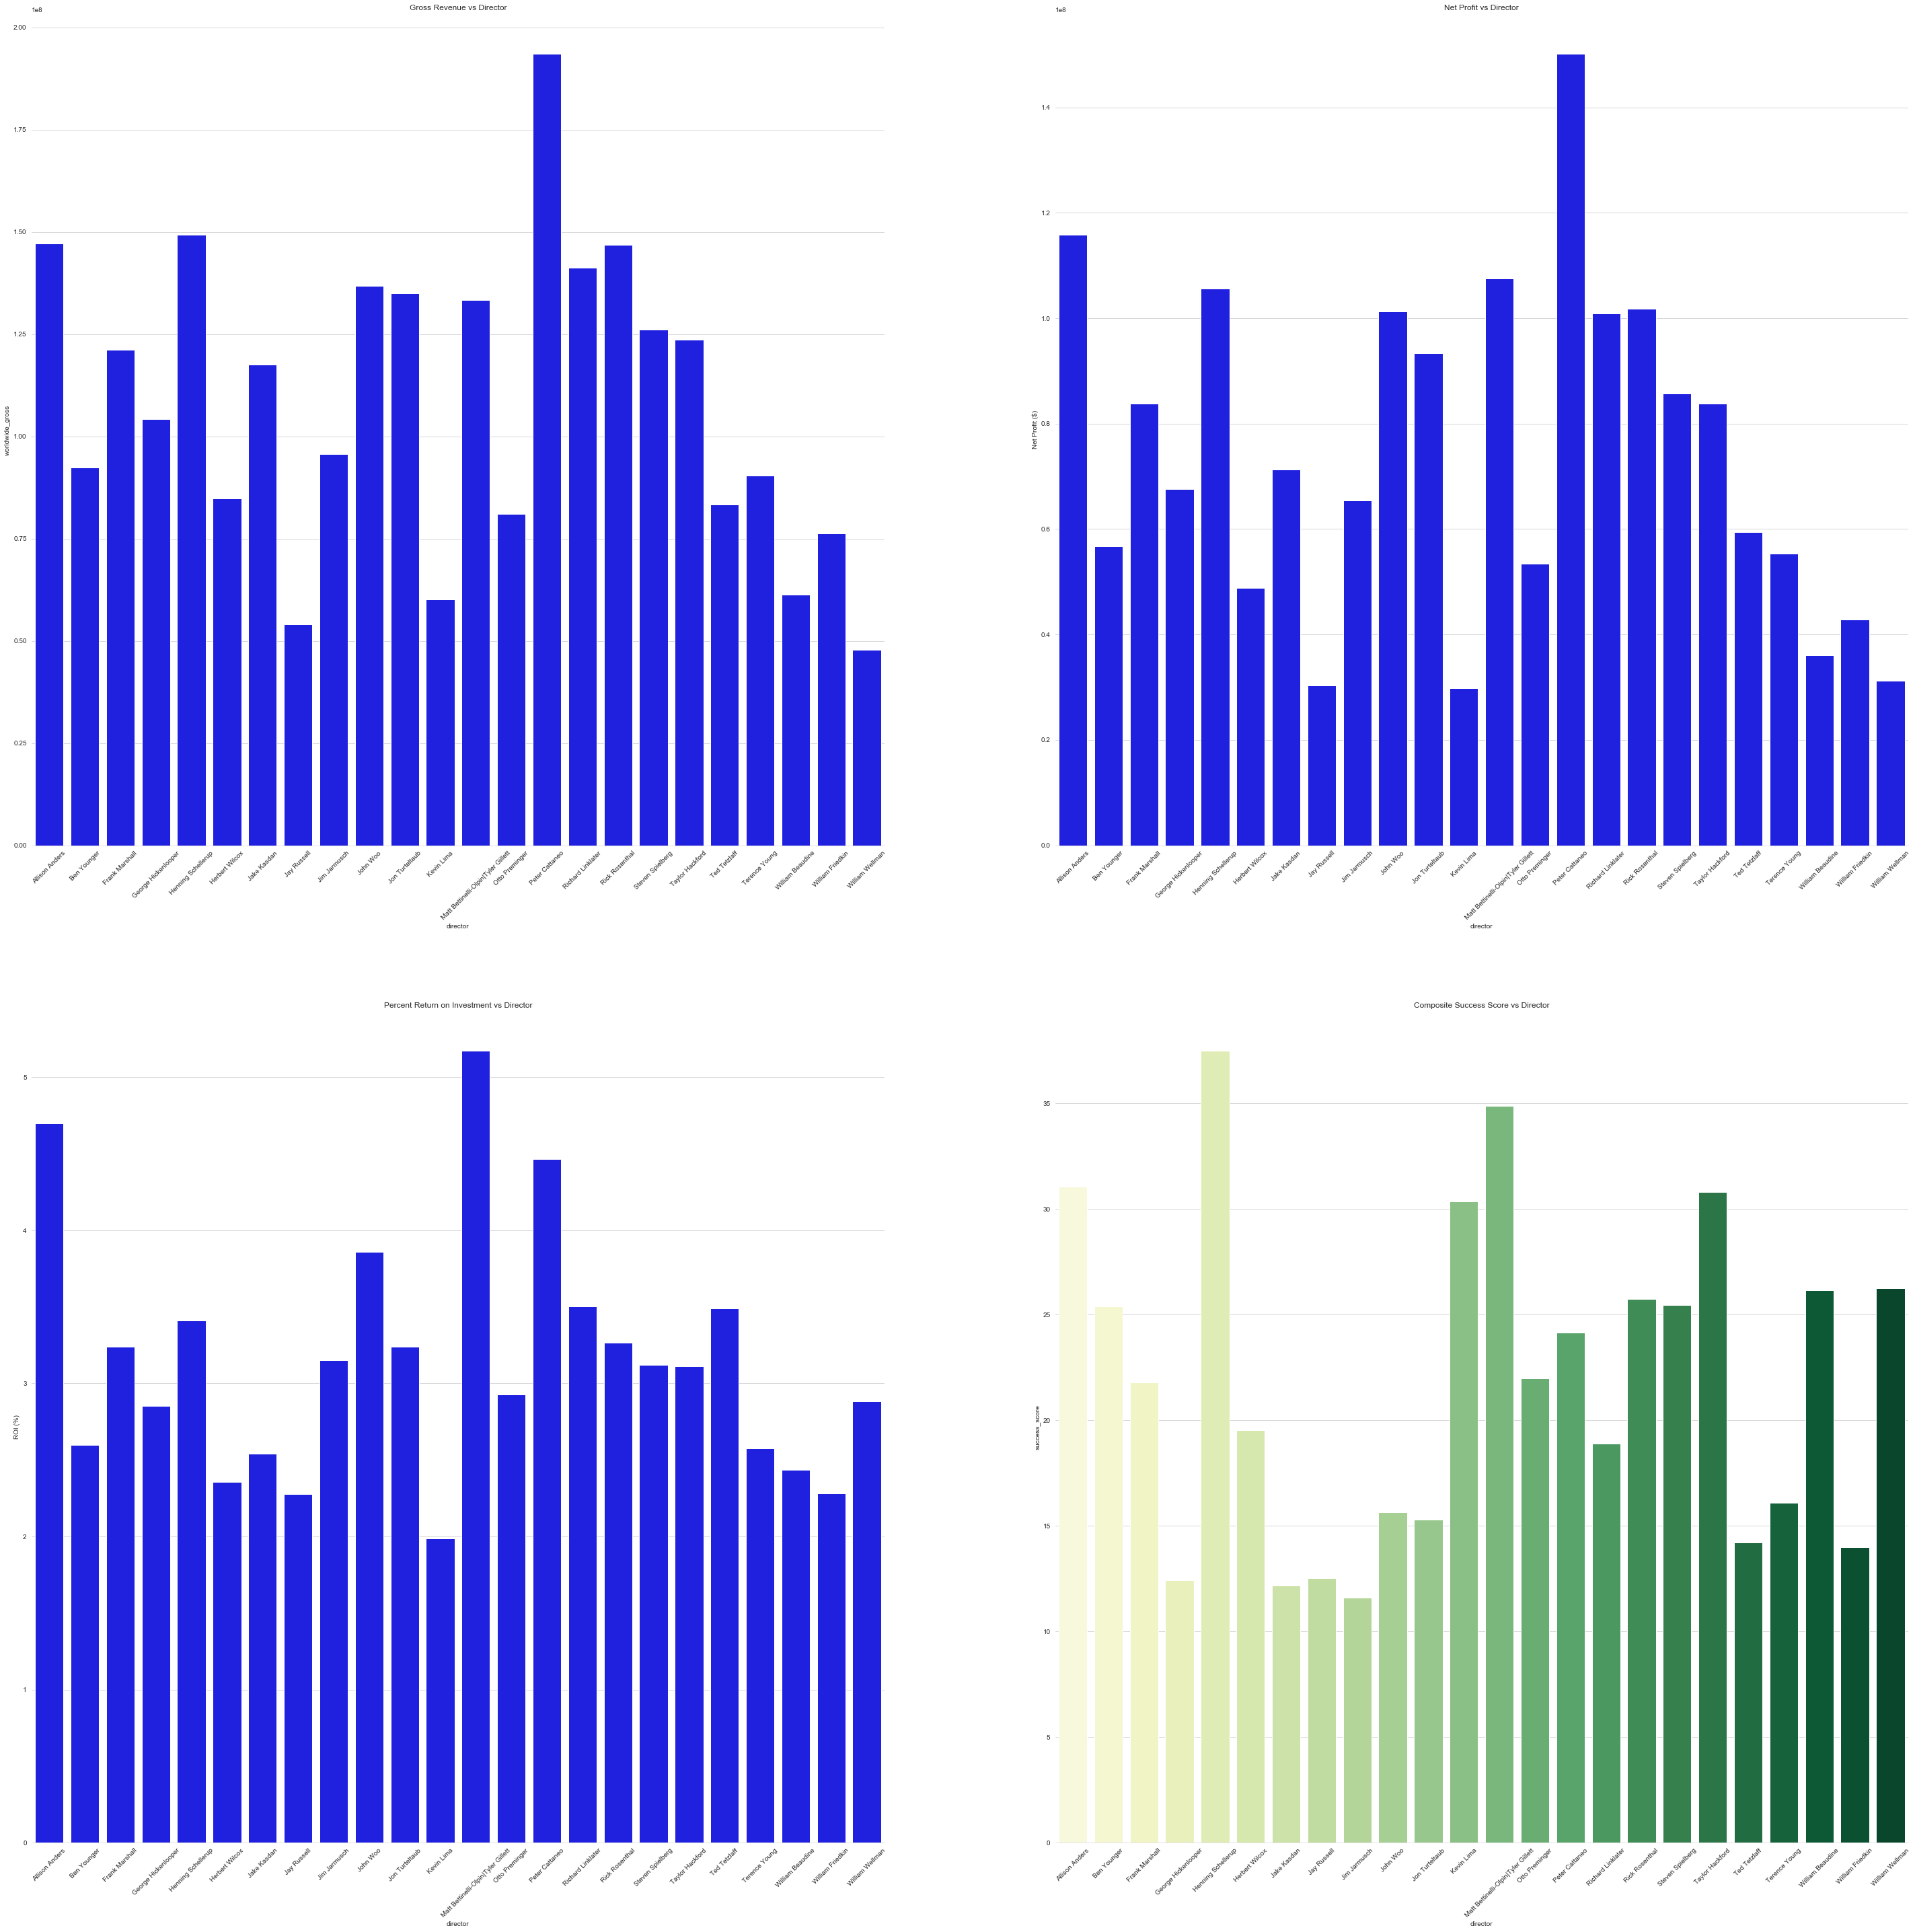

In [98]:
figure, ax = plt.subplots(2, 2, figsize=(50, 50))
x=master_table[:750].groupby("director").mean().index
y0_gross_rev= master_table[:750].groupby("director").mean().worldwide_gross
y1_net_prof= master_table[:750].groupby("director").mean().worldwide_gross-master_table[:750].groupby("director").mean().production_budget
y2_roi_percent= master_table[:750].groupby("director").mean().worldwide_gross/master_table[:750].groupby("director").mean().production_budget
y3_comp= master_table[:750].groupby("director").mean().success_score 
ax[0][0].set_title('Gross Revenue vs Director')
ax[0][0].set_xlabel('Director')
ax[0][0].set_ylabel('Gross Revenue ($)')
ax[0][1].set_title('Net Profit vs Director')
ax[0][1].set_xlabel('Director')
ax[0][1].set_ylabel('Net Profit ($)')
ax[1][0].set_title('Percent Return on Investment vs Director')
ax[1][0].set_xlabel('Director')
ax[1][0].set_ylabel('ROI (%)')
ax[1][1].set_title('Composite Success Score vs Director')
ax[1][1].set_xlabel('Director')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=45)
ax[0][1].set_xticklabels(x,rotation=45)
ax[1][0].set_xticklabels(x,rotation=45)
ax[1][1].set_xticklabels(x,rotation=45)

ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_color('#DDDDDD')

ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_color('#DDDDDD')

ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_color('#DDDDDD')

ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_color('#DDDDDD')

sns.set_style("whitegrid")
sns.barplot(x, y0_gross_rev, ax=ax[0][0], color='blue')
sns.barplot(x, y1_net_prof, ax=ax[0][1], color='blue')
sns.barplot(x, y2_roi_percent, ax=ax[1][0], color='blue')
sns.barplot(x, y3_comp, ax=ax[1][1], palette='YlGn')

plt.show()

# ax[0][0].bar(x, y0_gross_rev)
# ax[0][1].bar(x, y1_net_prof)
# ax[1][0].bar(x, y2_roi_percent)
# ax[1][1].bar(x, y3_comp)

In [38]:
df_composer = data['name_basics'].dropna(subset=['primary_profession','known_for_titles'])
df_composer["title_length"]=df_composer["known_for_titles"].map(lambda x: x.count(',') + 1)

/Users/MichaelWirtz/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [39]:
df_composer = df_composer[df_composer.primary_profession.str.contains('composer')]
df_composer.head()

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles,title_length
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",4
7,nm0063432,Stevie Be-Zet,NaN,NaN,"composer,soundtrack","tt3106212,tt0478239,tt0264917,tt1626606",4
8,nm0063618,Jeff Beal,1963.0,NaN,"composer,music_department,soundtrack","tt0183659,tt2545118,tt0384766,tt1856010",4
25,nm0069225,Gavin Bellour,NaN,NaN,"actor,producer,composer","tt0423370,tt2040257,tt0859592,tt7686128",4
28,nm0069990,Jorge Ben Jor,1942.0,NaN,"soundtrack,composer,actor","tt0099892,tt3731562,tt1103275,tt0118655",4


In [48]:
df_composer.sort_values(by='title_length',ascending=False, inplace=True)

In [109]:
gml=list(df_composer["known_for_titles"][:32])
genre_list=[]
for genres in gml:
    genre_list.append(list(genres.split(",")))
genre_list
genre_master=[]
genre_master=[]
for genre in genre_list:
    for subgenre in genre:
        genre_master.append(subgenre)
        
unique_genre_master=set(genre_master)
vector=list(range(0,46984))
df_genres=[]
df_consts=[]

for genre in unique_genre_master:
    for number in vector:
        if genre in df_composer.iloc[number, 5]:
            df_genres.append(genre)
            df_consts.append(df_composer.iloc[number, 1])
            
genre_table=pd.DataFrame({'composer':df_consts, 'tconst':df_genres})
# complete_genre_table=pd.merge(genre_table, df_composer, how="left", on="tconst")
# complete_genre_table

genre_table

,composer,tconst
0,Sergio Gurrola,tt9079302
1,Maria Vatenina,tt1362476
2,Scott Karahadian,tt2124945
3,Todd Maki,tt1315963
4,Jim Daneker,tt1315963
...,...,...
199,Lisa Holmqvist,tt1376710
200,Neil Cleary,tt3307900
201,Nazareno Andorno,tt1595648
202,Sebastien Pan,tt8254080


In [110]:
master_composer = pd.merge(master_table,genre_table, on='tconst')
master_composer.head()

,tconst,title_x,original_title,start_year,runtime_minutes,genres,title_y,averagerating,numvotes,mean_diff,...,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,composer
0,tt0882977,Snitch,Snitch,2013,112.0,"Action,Drama,Thriller",Snitch,6.5,78142,0.592985,...,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM,Samuel Ferrari
1,tt0882977,Snitch,Snitch,2013,112.0,"Action,Drama,Thriller",Snitch,6.5,78142,0.592985,...,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,"1,971,135",96 minutes,MGM,Ed Côrtes
2,tt2495778,Nerve,Nerve,2013,86.0,"Drama,Mystery,Thriller",Nerve,4.6,118,-1.307015,...,Classics|Comedy|Musical and Performing Arts,William Wellman,Nunnally Johnson,NaN,NaN,NaN,NaN,75 minutes,NaN,Haydn Walker
3,tt2495778,Nerve,Nerve,2013,86.0,"Drama,Mystery,Thriller",Nerve,4.6,118,-1.307015,...,Classics|Comedy|Musical and Performing Arts,William Wellman,Nunnally Johnson,NaN,NaN,NaN,NaN,75 minutes,NaN,Ramesh Sathiah
4,tt1517260,The Host,The Host,2013,125.0,"Action,Adventure,Drama",The Host,5.9,105633,-0.007015,...,Classics|Drama,Anatole Litvak,John Wexley,"Sep 21, 1940","Jul 18, 2006",NaN,NaN,106 minutes,NaN,Samuel Ferrari


<BarContainer object of 8 artists>

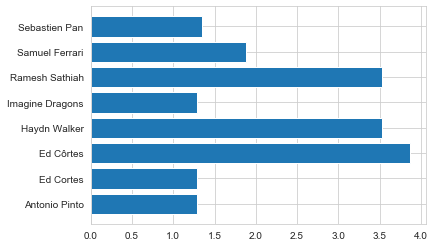

In [116]:
master_composer = master_composer[master_composer.composer != 'Matthew Emerson Brown']
master_composer = master_composer[master_composer.composer != 'Joshua Morrison']
master_composer = master_composer[master_composer.composer != 'Jeramy Koepping']

master_composer.groupby("composer").mean().sort_values("success_score", ascending=False)
plt.barh(master_composer.groupby("composer").mean().index, master_composer.groupby("composer").mean().worldwide_gross/master_composer.groupby("composer").mean().production_budget)

<BarContainer object of 11 artists>

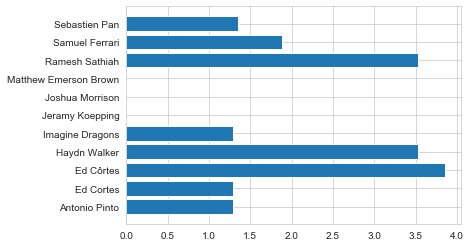

In [111]:
figure, ax = plt.subplots(2, 2, figsize=(50, 50))
x=master_composer.groupby("composer").median().index
y0_gross_rev= master_composer.groupby("composer").median().worldwide_gross
y1_net_prof= master_composer.groupby("composer").median().worldwide_gross-master_composer.groupby("composer").median().production_budget
y2_roi_percent= master_composer.groupby("composer").median().worldwide_gross/master_composer.groupby("composer").median().production_budget
y3_comp= master_composer.groupby("composer").median().success_score 

ax[0][0].set_title('Gross Revenue vs Composer')
ax[0][0].set_xlabel('Composer')
ax[0][0].set_ylabel('Gross Revenue ($)')
ax[0][1].set_title('Net Profit vs Composer')
ax[0][1].set_xlabel('Composer')
ax[0][1].set_ylabel('Net Profit ($)')
ax[1][0].set_title('Percent Return on Investment vs Composer')
ax[1][0].set_xlabel('Composer')
ax[1][0].set_ylabel('ROI (%)')
ax[1][1].set_title('Composite Success Score vs Composer')
ax[1][1].set_xlabel('Year')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=45)
ax[0][1].set_xticklabels(x,rotation=45)
ax[1][0].set_xticklabels(x,rotation=45)
ax[1][1].set_xticklabels(x,rotation=45)

ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_color('#DDDDDD')

ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_color('#DDDDDD')

ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_color('#DDDDDD')

ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_color('#DDDDDD')

sns.set_style("whitegrid")
sns.barplot(x, y0_gross_rev, ax=ax[0][0], color='blue')
sns.barplot(x, y1_net_prof, ax=ax[0][1], color='blue')
sns.barplot(x, y2_roi_percent, ax=ax[1][0], color='blue')
sns.barplot(x, y3_comp, ax=ax[1][1], palette='YlGn')

# ax[0][0].bar(x, y0_gross_rev)
# ax[0][1].bar(x, y1_net_prof)
# ax[1][0].bar(x, y2_roi_percent)
# ax[1][1].bar(x, y3_comp)

In [ ]:
master_table.groupby("start_year").mean().sort_values("success_score", ascending=False)
plt.barh(master_table.groupby("start_year").mean().index, master_table.groupby("start_year").mean().worldwide_gross/master_table.groupby("start_year").mean().production_budget)

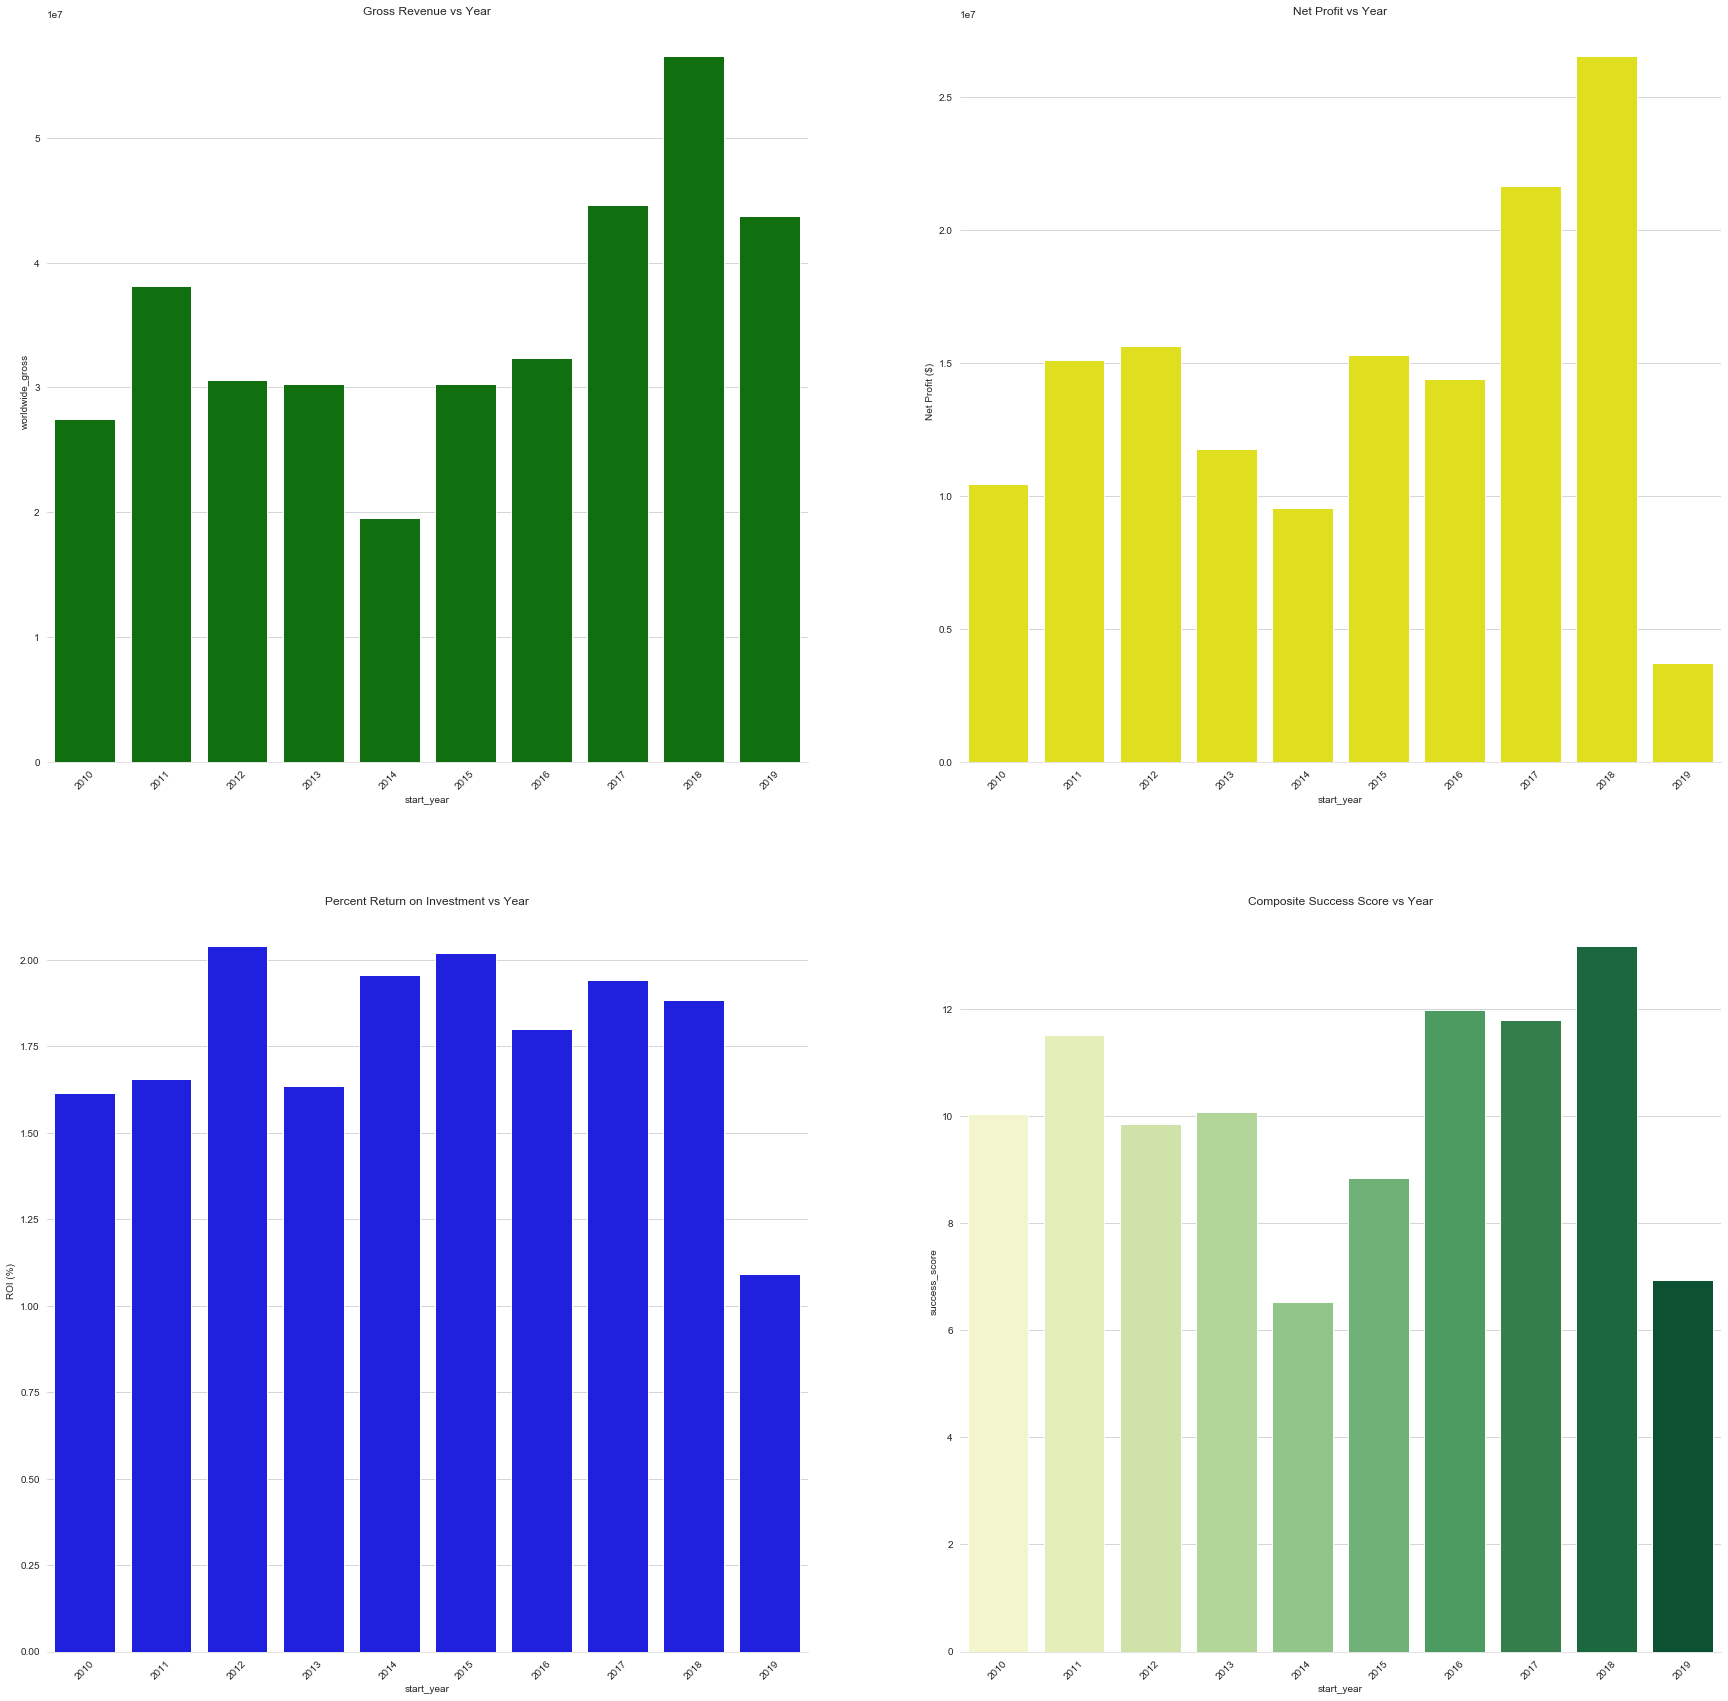

In [59]:
figure, ax = plt.subplots(2, 2, figsize=(30, 30))
x=master_table.groupby("start_year").median().index
y0_gross_rev= master_table.groupby("start_year").median().worldwide_gross
y1_net_prof= master_table.groupby("start_year").median().worldwide_gross-master_table.groupby("start_year").median().production_budget
y2_roi_percent= master_table.groupby("start_year").median().worldwide_gross/master_table.groupby("start_year").median().production_budget
y3_comp= master_table.groupby("start_year").median().success_score 

ax[0][0].set_title('Gross Revenue vs Year')
ax[0][0].set_xlabel('Year')
ax[0][0].set_ylabel('Gross Revenue ($)')
ax[0][1].set_title('Net Profit vs Year')
ax[0][1].set_xlabel('Year')
ax[0][1].set_ylabel('Net Profit ($)')
ax[1][0].set_title('Percent Return on Investment vs Year')
ax[1][0].set_xlabel('Year')
ax[1][0].set_ylabel('ROI (%)')
ax[1][1].set_title('Composite Success Score vs Year')
ax[1][1].set_xlabel('Year')
ax[1][1].set_ylabel('Success Score')

ax[0][0].set_xticklabels(x,rotation=45)
ax[0][1].set_xticklabels(x,rotation=45)
ax[1][0].set_xticklabels(x,rotation=45)
ax[1][1].set_xticklabels(x,rotation=45)

ax[0][0].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][0].spines['left'].set_visible(False)
ax[0][0].spines['bottom'].set_color('#DDDDDD')

ax[0][1].spines['top'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[0][1].spines['left'].set_visible(False)
ax[0][1].spines['bottom'].set_color('#DDDDDD')

ax[1][0].spines['top'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][0].spines['left'].set_visible(False)
ax[1][0].spines['bottom'].set_color('#DDDDDD')

ax[1][1].spines['top'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)
ax[1][1].spines['left'].set_visible(False)
ax[1][1].spines['bottom'].set_color('#DDDDDD')

sns.set_style("whitegrid")
sns.barplot(x, y0_gross_rev, ax=ax[0][0], color='green')
sns.barplot(x, y1_net_prof, ax=ax[0][1], color='yellow')
sns.barplot(x, y2_roi_percent, ax=ax[1][0], color='blue')
sns.barplot(x, y3_comp, ax=ax[1][1], palette='YlGn')

# ax[0][0].bar(x, y0_gross_rev)
# ax[0][1].bar(x, y1_net_prof)
# ax[1][0].bar(x, y2_roi_percent)
# ax[1][1].bar(x, y3_comp)

In [ ]:
data['movies'].head()

In [ ]:
from functions import *

In [ ]:
bar_plot_success('start_year','Year')